<a href="https://colab.research.google.com/github/Lusiji254/Machine-Learning/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import math
import decimal
from sklearn.linear_model import Lasso,LassoCV, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20190629_003153.jpg
 20220531_155346.mp4
'Advanced DB.gdoc'
'AMT Attachment details.gdoc'
 batch1.zip
 batch2.zip
 batch3.zip
'Colab Notebooks'
'Copy of Aliena · SlidesCarnival.gslides'
'Copy of Futuristic Background | by Slidesgo (1).gslides'
'Copy of Futuristic Background | by Slidesgo (2).gslides'
'Copy of Futuristic Background | by Slidesgo.gslides'
'Copy of Imogen · SlidesCarnival.gslides'
'Copy of Pneumothorax Clinical Case by Slidesgo (1).gslides'
'Copy of Pneumothorax Clinical Case by Slidesgo.gslides'
'Copy of Pulmonary Disease by Slidesgo.gslides'
 customTF2
 customTF2r
'Diagnosis of Pneumothorax through Image Segmentation of Chest X-rays Using CNN   .gslides'
 Foros
'Group 4 - CAT 2.gslides'
 Interviews.gdoc
'IS Concept Note.gdoc'
 LabelData.zip
'Lubare Family Investment Contributions.gsheet'
'Machine Learning'
 model_best
'My Drive'
'Our group project DBIT 2019.gdoc'
'Paraphrased copy.gdoc'
'Plastic Waste Management using Blockchain Technology.gs

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Nairobi Office Price Ex (1).csv')
data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


In [ ]:
#Check for missing values
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)


0

#Encode the dataset

In [ ]:
original_features = list(data.columns)
original_features


['LOC',
 'FUR',
 'AMB',
 'PROX_SCH',
 'PROX_ROAD',
 'PROX_MALL',
 'WATER',
 'HK_SER',
 'SIZE',
 'PRICE']

In [ ]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['LOC', 'FUR', 'AMB', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER']

In [ ]:
nominal=['LOC', 'FUR', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL', 'WATER', 'HK_SER']


In [ ]:
ordinal=list(set(categorical_features)-set(nominal))
ordinal

['AMB']

In [ ]:
numerical=list(set(original_features)-set(categorical_features))
numerical


['SIZE', 'PRICE']

In [ ]:
target = ['PRICE']
data[target]

,PRICE
0,31.707006
1,68.777596
2,62.562382
3,71.546632
4,87.230925
5,78.211518
6,79.641973
7,59.171489
8,75.331242
9,71.300880


In [ ]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes
  df_ordinal=data[ordinal]

In [ ]:
df_ordinal

,AMB
0,2
1,1
2,0
3,1
4,1
5,2
6,3
7,2
8,1
9,2


In [ ]:
df_nominal=pd.get_dummies(data[nominal])

In [ ]:
data[df_nominal]

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [ ]:
new_data

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,PROX_SCH_no,PROX_SCH_yes,PROX_ROAD_no,PROX_ROAD_yes,PROX_MALL_no,PROX_MALL_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes,AMB,SIZE,PRICE
0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,2,32.502345,31.707006
1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,53.426804,68.777596
2,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,61.530358,62.562382
3,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,47.475640,71.546632
4,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,59.813208,87.230925
5,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,2,55.142188,78.211518
6,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,3,52.211797,79.641973
7,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,2,39.299567,59.171489
8,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,48.105042,75.331242
9,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,2,52.550014,71.300880


In [ ]:
new_data.shape

(14, 20)

#Identifying features using L1 Embedding

In [ ]:
X = new_data.drop('PRICE', 1)
y = new_data['PRICE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
regressor=LassoCV()
regressor.fit(X,y)
regressor.coef_


array([ 0.        ,  0.        , -4.34372285,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  3.99495048,
       -0.        ,  0.29805851, -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  2.08578238,  1.41027233])

In [ ]:
regressor.intercept_

-5.293865785598001

L1 selected only  5  features out of  19  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

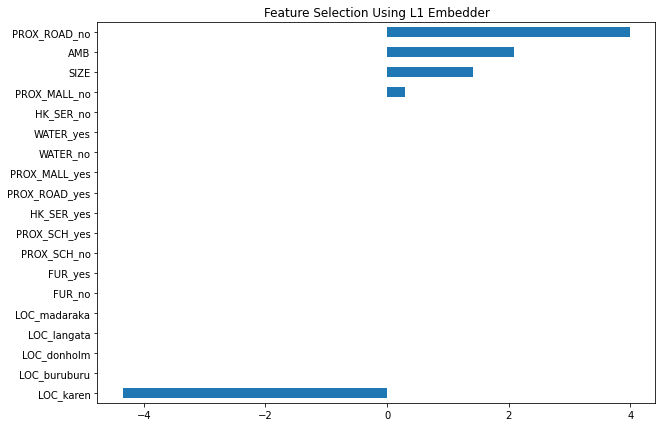

In [ ]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=X.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")


# Standardize
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
X

,LOC_buruburu,LOC_donholm,LOC_karen,LOC_langata,LOC_madaraka,FUR_no,FUR_yes,PROX_SCH_no,PROX_SCH_yes,PROX_ROAD_no,PROX_ROAD_yes,PROX_MALL_no,PROX_MALL_yes,WATER_no,WATER_yes,HK_SER_no,HK_SER_yes,AMB,SIZE
0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,2,32.502345
1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,53.426804
2,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,61.530358
3,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,47.475640
4,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,59.813208
5,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,2,55.142188
6,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,3,52.211797
7,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,2,39.299567
8,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,48.105042
9,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,2,52.550014


In [ ]:
X=new_data.to_numpy()

In [ ]:
X

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  2.        , 32.50234527],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        , 53.42680403],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        , 61.53035803],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.   

In [ ]:
X[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  2.        , 32.50234527])

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
X[0]

array([-0.40824829, -0.40824829,  1.34164079, -0.52223297, -0.40824829,
       -0.74535599,  0.74535599,  1.        , -1.        , -0.8660254 ,
        0.8660254 , -0.8660254 ,  0.8660254 , -0.74535599,  0.74535599,
       -0.74535599,  0.74535599,  0.89802651, -2.28520557])

In [ ]:
y=data[target].to_numpy()

In [ ]:
y

array([[31.70700585],
       [68.77759598],
       [62.5623823 ],
       [71.54663223],
       [87.23092513],
       [78.21151827],
       [79.64197305],
       [59.17148932],
       [75.3312423 ],
       [71.30087989],
       [55.16567715],
       [82.47884676],
       [62.00892325],
       [75.39287043]])

In [ ]:
y.shape

(14, 1)

In [ ]:
y=StandardScaler().fit_transform(y)

In [ ]:
y

array([[-2.72264663],
       [ 0.0124287 ],
       [-0.44613097],
       [ 0.21672874],
       [ 1.37391891],
       [ 0.70846532],
       [ 0.81400455],
       [-0.69631171],
       [ 0.495958  ],
       [ 0.19859708],
       [-0.99186131],
       [ 1.02330965],
       [-0.48696528],
       [ 0.50050494]])

In [ ]:
X.shape

(14, 19)

#Training the model

In [62]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [84]:
model = Sequential()
model.add(Dense(4, input_dim=19 ,activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['Accuracy'])

history = model.fit(X_train, y_train, verbose=1, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.9463 - Accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 1.9413 - Accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.9363 - Accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.9311 - Accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9257 - Accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 1.9202 - Accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9144 - Accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9083 - Accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 1.9020 - Accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.8954 - Ac

In [83]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 4)                 80        
                                                                 
 dense_28 (Dense)            (None, 2)                 10        
                                                                 
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
